In [125]:
import numpy
import pandas as pd
from sklearn.preprocessing import StandardScaler
from sklearn.cross_validation import train_test_split
numpy.random.seed(10)

In [126]:
all_df = pd.read_csv("data/titanic.csv")

In [127]:
cols=['survived','pclass' ,'sex', 'age',
       'fare',]
df=all_df[cols]
df.isnull().sum()
df=df.values

In [128]:
X = df[:,1:]
Y = df[:,0]
X[:5]

array([[  1.    ,   0.    ,  29.    , 211.3375],
       [  1.    ,   1.    ,   0.9167, 151.55  ],
       [  1.    ,   0.    ,   2.    , 151.55  ],
       [  1.    ,   1.    ,  30.    , 151.55  ],
       [  1.    ,   0.    ,  25.    , 151.55  ]])

In [129]:
Y[:5]

array([1., 1., 0., 0., 0.])

In [147]:
 X = StandardScaler().fit_transform(X)
train_Features, test_Features, train_Label, test_Label = train_test_split(X, Y, test_size=0.2, random_state=True) 
len(train_Features)

1046

In [131]:
train_Features[355:359]

array([[ 0.84246649, -1.34419751,  0.8216082 , -0.46039806],
       [ 0.84246649, -1.34419751,  0.09991351, -0.19415727],
       [ 0.84246649,  0.74393829, -0.18876436, -0.49092056],
       [-0.35140802, -1.34419751,  0.17208298, -0.23764487]])

In [132]:
train_Features[:4]

array([[-1.54528253, -1.34419751,  0.09991351,  1.02832767],
       [ 0.84246649,  0.74393829,  1.54330288, -0.48794021],
       [ 0.84246649,  0.74393829, -0.69395064, -0.49092056],
       [ 0.84246649,  0.74393829, -0.5496117 , -0.49373855]])

In [133]:
train_Label[:4]

array([1., 0., 0., 0.])

In [134]:
from keras.models import Sequential
from keras.layers import Dense,Dropout

In [135]:
model = Sequential()

In [136]:
model.add(Dense(units=40, input_dim=4, 
                kernel_initializer='uniform', 
                activation='relu'))

In [137]:
model.add(Dense(units=4, 
                kernel_initializer='uniform', 
                activation='relu'))

In [138]:
model.add(Dense(units=1, 
                kernel_initializer='uniform',
                activation='sigmoid'))

In [139]:
model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_16 (Dense)             (None, 40)                200       
_________________________________________________________________
dense_17 (Dense)             (None, 4)                 164       
_________________________________________________________________
dense_18 (Dense)             (None, 1)                 5         
Total params: 369
Trainable params: 369
Non-trainable params: 0
_________________________________________________________________


In [140]:
model.compile(loss='binary_crossentropy', 
              optimizer='adam', metrics=['accuracy'])

In [141]:
train_history =model.fit(x=train_Features, 
                         y=train_Label, 
                         validation_split=0.1, 
                         epochs=30, 
                         batch_size=30,verbose=2)

Train on 941 samples, validate on 105 samples
Epoch 1/30
 - 1s - loss: 0.6909 - acc: 0.6036 - val_loss: 0.6874 - val_acc: 0.6571
Epoch 2/30
 - 0s - loss: 0.6826 - acc: 0.6514 - val_loss: 0.6760 - val_acc: 0.6952
Epoch 3/30
 - 0s - loss: 0.6600 - acc: 0.7662 - val_loss: 0.6524 - val_acc: 0.7333
Epoch 4/30
 - 0s - loss: 0.6125 - acc: 0.7768 - val_loss: 0.6162 - val_acc: 0.7429
Epoch 5/30
 - 0s - loss: 0.5534 - acc: 0.7715 - val_loss: 0.5792 - val_acc: 0.7333
Epoch 6/30
 - 0s - loss: 0.5074 - acc: 0.7747 - val_loss: 0.5566 - val_acc: 0.7429
Epoch 7/30
 - 0s - loss: 0.4805 - acc: 0.7790 - val_loss: 0.5487 - val_acc: 0.7333
Epoch 8/30
 - 0s - loss: 0.4686 - acc: 0.7811 - val_loss: 0.5461 - val_acc: 0.7429
Epoch 9/30
 - 0s - loss: 0.4631 - acc: 0.7821 - val_loss: 0.5453 - val_acc: 0.7429
Epoch 10/30
 - 0s - loss: 0.4604 - acc: 0.7832 - val_loss: 0.5453 - val_acc: 0.7333
Epoch 11/30
 - 0s - loss: 0.4575 - acc: 0.7832 - val_loss: 0.5424 - val_acc: 0.7429
Epoch 12/30
 - 0s - loss: 0.4558 - acc:

In [142]:
import matplotlib.pyplot as plt
def show_train_history(train_history,train,validation):
    plt.plot(train_history.history[train])
    plt.plot(train_history.history[validation])
    plt.title('Train History')
    plt.ylabel(train)
    plt.xlabel('Epoch')
    plt.legend(['train', 'validation'], loc='upper left')
    plt.show()

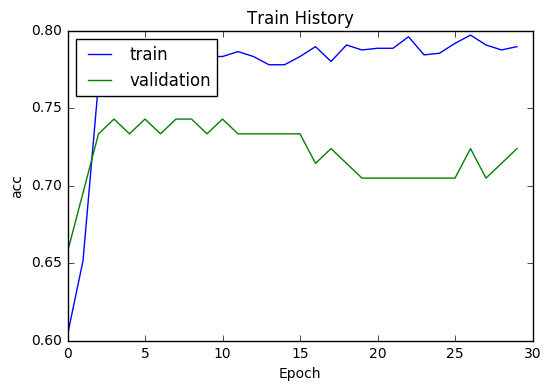

In [143]:
show_train_history(train_history,'acc','val_acc')

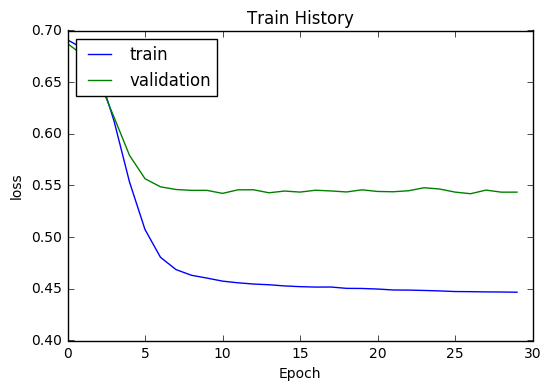

In [144]:
show_train_history(train_history,'loss','val_loss')

In [145]:
scores = model.evaluate(x=test_Features, 
                        y=test_Label)

262/262 [==============================] - 0s 81us/step


In [146]:
scores[1]

0.7900763354228653